# Import libraries

In [1]:
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.contrib.keras.python.keras.optimizers import Adam
from tensorflow.contrib.keras.python.keras.callbacks import EarlyStopping
from tensorflow.contrib.keras.python.keras.regularizers import l1, l2

import numpy as np
import matplotlib.pyplot as plt

/home/amil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/amil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/amil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/amil/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

ModuleNotFoundError: No module named 'tensorflow.contrib.keras.python'

# Load dataset

In [ ]:
trainingset = np.loadtxt('fer2013_training_onehot.csv', delimiter=',')
testingset = np.loadtxt('fer2013_publictest_onehot.csv', delimiter=',')

trainingset

# Split data

In [4]:
n_inputs = 2304
n_classes = 7
img_dim = 48

x_training = trainingset[:, 0:n_inputs]
y_training = trainingset[:, n_inputs:n_inputs + n_classes]

x_testing = testingset[:, 0:n_inputs]
y_testing = testingset[:, n_inputs:n_inputs + n_classes]

x_training = x_training.reshape(x_training.shape[0], 48, 48)
x_training = np.expand_dims(x_training, axis=4)

x_testing = x_testing.reshape(x_testing.shape[0], 48, 48)
x_testing = np.expand_dims(x_testing, axis=4)

In [5]:
def get_emotion(ohv):
    if ohv.shape[0] == 1:
        indx = ohv[0]
    else:
        indx = np.argmax(ohv)
        
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48, 1)
(28709, 7)
(3589, 48, 48, 1)
(3589, 7)


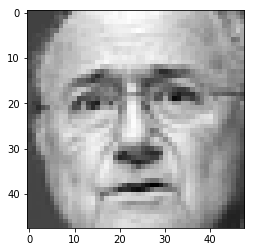

facial emotion: fear


In [6]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sample = x_training[5, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[5, :]))

# Define model: a model in karas is a sequence of layers!

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape = (48, 48, 1)))

In [9]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [11]:
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

In [12]:
model.add(Conv2D(128, (3, 3), activation='relu'))

In [13]:
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

In [14]:
model.add(Conv2D(256, (3, 3), activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile model

In [17]:
opt = Adam(lr=0.0001, decay=10e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit model

In [18]:
batch_size = 128
n_epoches = 500
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model.fit(x_training, y_training, batch_size=batch_size, epochs=n_epoches,
          validation_data=(x_testing, y_testing), shuffle=True,
          callbacks=[early_stopping])

Train on 28709 samples, validate on 3589 samples
Epoch 1/500
28709/28709 [==============================] - 34s - loss: 4.0002 - acc: 0.2622 - val_loss: 3.2422 - val_acc: 0.3789
Epoch 2/500
28709/28709 [==============================] - 31s - loss: 3.0999 - acc: 0.3928 - val_loss: 2.8896 - val_acc: 0.4341
Epoch 3/500
28709/28709 [==============================] - 30s - loss: 2.7931 - acc: 0.4452 - val_loss: 2.6350 - val_acc: 0.4792
Epoch 4/500
28709/28709 [==============================] - 31s - loss: 2.5240 - acc: 0.4982 - val_loss: 2.4196 - val_acc: 0.5130
Epoch 5/500
28709/28709 [==============================] - 30s - loss: 2.3139 - acc: 0.5376 - val_loss: 2.2493 - val_acc: 0.5453
Epoch 6/500
28709/28709 [==============================] - 29s - loss: 2.1313 - acc: 0.5739 - val_loss: 2.1293 - val_acc: 0.5564
Epoch 7/500
28709/28709 [==============================] - 28s - loss: 1.9613 - acc: 0.6081 - val_loss: 2.0383 - val_acc: 0.5659
Epoch 8/500
28709/28709 [=======================

# Evaluate model

In [19]:
scores = model.evaluate(x_testing, y_testing)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

3584/3589 [============================>.] - ETA: 0sacc: 60.74%


In [20]:
model.save('fer2013.h5')
model.save_weights('fer2013_weights.h5')

# Load trained model

In [21]:
model.load_weights('fer2013_weights.h5')

In [86]:
scores = model.evaluate(x_testing, y_testing)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

3589/3589 [==============================] - 2s     
acc: 60.74%


***
# Test trained model

1/1 [==============================] - 0s


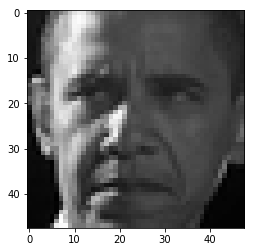

> testing image index: 2785
> true emotion: angry
> predicted emotion: angry


In [46]:
# 2163
img_indx = np.uint32(np.random.rand()*(testingset.shape[0] - 1))
sample = x_testing[img_indx, :]
sample = sample.reshape(48, 48)

pred_cls = model.predict_classes(sample.reshape(1, 48, 48, 1))

plt.imshow(sample, cmap='gray')
plt.show()
print('> testing image index: %d\n> true emotion: %s\n> predicted emotion: %s' % (img_indx, get_emotion(y_testing[img_indx, :]), get_emotion(pred_cls)))

***
# Partial accuracy

In [84]:
for emo_indx in range(0, n_classes):
    data_for_class = testingset[testingset[:, 2304 + emo_indx] == 1]
    x_data = data_for_class[:, 0:2304]
    x_data = x_data.reshape(x_data.shape[0], 48, 48)
    x_data = np.expand_dims(x_data, axis=4)

    y_data = data_for_class[:, 2304:2304 + n_classes]

    scores = model.evaluate(x_data, y_data, batch_size=32, verbose=0)
    print('> Accuracy %.2f%% for <%s>'% (scores[1]*100, get_emotion(np.array([emo_indx]))))

> Accuracy 52.46% for <angry>
> Accuracy 62.50% for <disgust>
> Accuracy 46.77% for <fear>
> Accuracy 78.88% for <happy>
> Accuracy 44.87% for <sad>
> Accuracy 80.00% for <surprise>
> Accuracy 55.52% for <neutral>
